In [ ]:
!pip install pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd

aggregate_df = pd.DataFrame(columns=["mlqa_avg_qsm", "mlqa_avg_asm", "coqa_avg_qsm", "coqa_avg_asm"])

def update_aggregate_df(model_name, file_path):
  df = pd.read_json(file_path)
  mlqa_avg_qsm = df[df["source"] == "mlqa"]["question_semantic_similarity"].mean()
  mlqa_avg_asm = df[df["source"] == "mlqa"]["answer_semantic_similarity"].mean()
  coqa_avg_qsm = df[df["source"] == "coqa"]["question_semantic_similarity"].mean()
  coqa_avg_asm = df[df["source"] == "coqa"]["answer_semantic_similarity"].mean()
  global aggregate_df
  aggregate_df = aggregate_df.append(pd.DataFrame([[mlqa_avg_qsm, mlqa_avg_asm, coqa_avg_qsm, coqa_avg_asm]],index=[model_name],columns=aggregate_df.columns))

update_aggregate_df("bart-base", "./generated/bart-base.json")
update_aggregate_df("distilbart", "./generated/distilbart.json")
update_aggregate_df("gpt2-small", "./generated/gpt2-small.json")
update_aggregate_df("t5-base", "./generated/t5-base.json")
update_aggregate_df("t5-large", "./generated/t5-large.json")

print(aggregate_df.head())

            mlqa_avg_qsm  mlqa_avg_asm  coqa_avg_qsm  coqa_avg_asm
bart-base       0.597067      0.850951      0.388793      0.654058
distilbart      0.613098      0.838836      0.368486      0.644957
gpt2-small      0.474006      0.663012      0.392500      0.625554
t5-base         0.635866      0.861155      0.435214      0.692511
t5-large        0.601336      0.836608      0.434320      0.735961


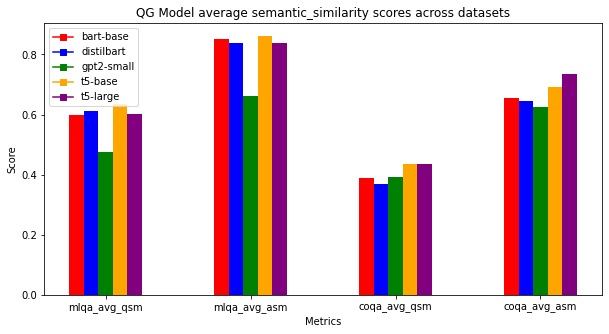

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines

# creating the dataset
models = list(aggregate_df.index)
metrics = list(aggregate_df.columns)
width = 0.2

fig = plt.figure(figsize = (10, 5))
x = np.arange(len(metrics))
width = 0.1
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, aggregate_df.loc[['bart-base']].values[0], width, color="red")
plt.bar(x-0.1, aggregate_df.loc[['distilbart']].values[0], width, color="blue")
plt.bar(x, aggregate_df.loc[['gpt2-small']].values[0], width, color="green")
plt.bar(x+0.1, aggregate_df.loc[['t5-base']].values[0], width, color="orange")
plt.bar(x+0.2, aggregate_df.loc[['t5-large']].values[0], width, color="purple")

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.xticks(x, metrics)
plt.title("QG Model average semantic_similarity scores across datasets")
plt.legend(handles=[
    mlines.Line2D([], [], marker="s", color='red', label='bart-base'),
    mlines.Line2D([], [], marker="s", color='blue', label='distilbart'),
    mlines.Line2D([], [], marker="s", color='green', label='gpt2-small'),
    mlines.Line2D([], [], marker="s", color='orange', label='t5-base'),
    mlines.Line2D([], [], marker="s", color='purple', label='t5-large'),
])
plt.show()